Pembahasan Topik 
1. Word Cloud
2. Waffle Charts
3. librari Matplotlib
4. librari Seaborn (Plot Regresi)

Dataset :
*Imigrasi ke Kanada dari 1980 hingga 2013* - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. *Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan*. Data tersebut menyajikan *arus masuk* dan *arus keluar* menurut *tempat lahir*, *kewarganegaraan* atau tempat tinggal sebelumnya/selanjutnya baik untuk *orang asing* maupun *warga negara*. Untuk pelajaran ini, kami akan fokus pada data **Imigrasi Kanada**

In [1]:
import numpy as np  # digunkan untuk komputasi ilmiah Python 
import pandas as pd # digunkan untuk perpustakaan struktur data 
from PIL import Image # digunkan untuk mengonversi gambar menjadi array

Untuk mengakses *dataset imigrasi Kanada* dengan menggunakan librari **Pandas** `read_excel()`

In [2]:
df_can = pd.read_excel("Canada.xlsx", sheet_name='Canada by Citizenship',
                      skiprows=range(20), skipfooter=2)
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
# jumlah bannyaknya entri kumpulan data
print(df_can.shape)

# proses modifikasi dataset untuk mempermudah proses visualisasi
# clean up the dataset to remove unnecessary columns (eg. REG, AREA, DEV, Type, Coverage)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName': 'Country',
              'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

(195, 43)
data dimensions: (195, 38)


C:\Users\Thendro\AppData\Local\Temp\ipykernel_5100\784310549.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


# Visualizing Data Using Matplotlib

In [4]:
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts 

mpl.style.use('ggplot') # optional: for ggplot-like style 

# Waffle Charts
*Waffle chart* adalah visualisasi menarik yang biasanya dibuat **untuk menampilkan progress menuju tujuan**. **Waffle Chart** biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari *sel*, seperti *dasbor Excel*. 

Beberapa studi kasus sebelumnya sudah dibahas tentang *Denmark*, *Norwegia*, dan *Swedia*.

In [5]:
# berikut perintah untuk menampung dataframe dari ketiga negara
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :] 

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Pad **R, waffle charts** *tidak built in dalam pustaka visualisasi Python mana pun*. Oleh karena itu, kita akan belajar cara membuatnya dari awal.

berikut  langkah langkahnya :

**Langkah Pertama : Membuat waffle dengan menentukan _proporsi_ setiap *kategori sehubungan* dengan _totalnya_**.

In [6]:
# total_value membuat jumlah dari ketiga negara Denmark, Norwegia, dan Swedia
# menampunng proporsi (kolom total 3 negara /  jumlah tiga negara) kedalam bentuk list
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values)
                        for value in df_dsn['Total']]

# untuk menampilkan keterangan jumlah proporsi dalam 3 negara
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [7]:
print(sum(df_dsn['Total']))
for bal in df_dsn['Total']:
    print (bal)

12094
3901
2327
5866


**Langkah ke dua : menentukan ukuran keseluruhan dari _waffle chart_**.

In [8]:
lebar = 40 # lebar grafik 
tinggi = 10 # tinggi grafik 
total_num_tiles = lebar * tinggi # jumlah total ubin 

print('Jumlah nomor dari title adalah : ', total_num_tiles)

Jumlah nomor dari title adalah :  400


**Langkah ke tiga : menggunakan *proporsi* tiap kategori untuk menentukan _jumlah ubin masing-masing kategori_**

In [9]:
# menghitung jumlah proportion 3 negara diatas dikali total_num_title (400)
tiles_per_category = [round(proportion * total_num_tiles)
                      for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Berdasarkan proporsi yang dihitung, *Denmark* akan menempati `129 ubin`, *Norwegia* akan menempati `77 ubin`, dan *Swedia* akan menempati `194 ubin`. 

**Langkah ke empat : membuat *matriks* yang menyerupai *wafel* dan mengisinya.**

In [10]:
# membuat waffe chart dalam matriks kosong (tinggi(10 kali), lebar(40 array))
waffle_chart = np.zeros((tinggi, lebar)) 

# menentukan indeks untuk diulang dalam bagan wafel
category_index = 0 
tile_index = 0 

# membuat 40 dan 10 baris perkolom  
for col in range(lebar):
    for row in range(tinggi): 
        tile_index += 1 
        
# jika jumlah kondisi ubin yang diisi untuk kategori sama dengan ubin yang dialokasikan terkait...
if tile_index > sum(tiles_per_category[0:category_index]): 
    category_index += 1 # ...untuk memproses ke kategori selanjutnya 
    
# set the class value to an integer, which increases with class 
waffle_chart[row, col] = category_index 

print ('Waffle chart populated!')

Waffle chart populated!


In [11]:
# tampilan matriks waffle_char
waffle_chart

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan *jumlah total instance* setiap kategori disesuaikan dengan *jumlah ubin* yang dialokasikan untuk setiap kategori. 

**Langkah ke lima : Petakan *matriks waffle chart* menjadi visual.**

<Figure size 432x288 with 0 Axes>

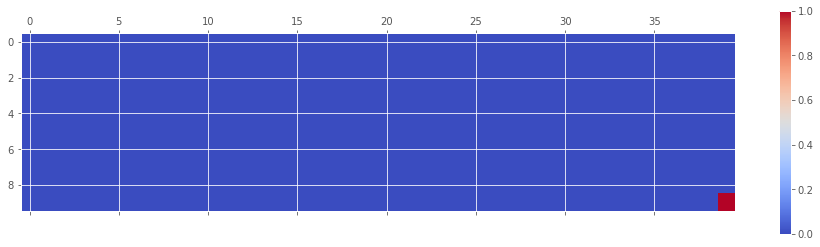

In [12]:
# instantiate a new figure object
fig = plt.figure()

# (plt.cm.coolwarm) untuk memberikan Objek peta warna dasar berdasarkan tabel pencarian menggunakan segmen linier.
# (plt.cm) untuk pemePeta-an warna bawaan, utilitas penanganan peta warna, dan mixin `ScalarMappable`.
# (.matshow()) untuk menampilkan bagan wafel
# (cmap) untuk melakukan pemetaan warna
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Langkah ke enam : mempercantik gambar chart**

([], [])

<Figure size 432x288 with 0 Axes>

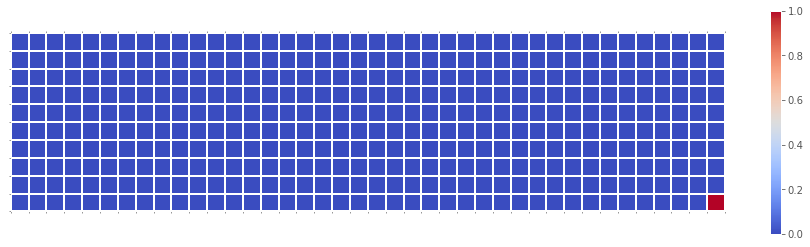

In [13]:
# instantiate a new figure object 
fig = plt.figure() 

# use matshow to display the waffle chart 
colormap = plt.cm.coolwarm 
plt.matshow(waffle_chart, cmap=colormap) 
plt.colorbar() 

# (plt.gca()) untuk menDapatkan Axes saat ini 
ax = plt.gca() 

# set minor ticks 
ax.set_xticks(np.arange(-.5, (lebar), 1), minor=True) 
ax.set_yticks(np.arange(-.5, (tinggi), 1), minor=True) 

# add gridlines based on minor ticks 
ax.grid(which='minor', color='w', linestyle='-', linewidth=2) 

plt.xticks([]) 
plt.yticks([])

**Langkah ke tujuh - menambahkan perintah legend**

nilai i :  0 kategori :  Denmark label_str :  Denmark (3901)
warna :  (0.6513978391568627, 0.7681214866470587, 0.9958911501294118, 1.0)
nilai i :  1 kategori :  Norway label_str :  Norway (2327)
warna :  (0.8796222636039216, 0.8581749384078431, 0.845843868137255, 1.0)
nilai i :  2 kategori :  Sweden label_str :  Sweden (5866)
warna :  (0.705673158, 0.01555616, 0.150232812, 1.0)


<Figure size 432x288 with 0 Axes>

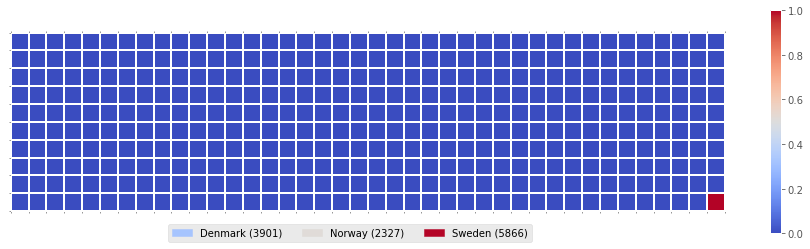

In [14]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# (plt.gca()) untuk menDapatkan Axes saat ini
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (lebar), 1), minor=True)
ax.set_yticks(np.arange(-.5, (tinggi), 1), minor=True)

# menambahkan garis kisi berdasarkan centang kecil
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# menghitung jumlah kumulatif dari kategori individu untuk mencocokkan skema warna antara bagan dan legenda
# (np.cumsum) untuk Mengembalikan jumlah kumulatif elemen di sepanjang sumbu tertentu.
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# peintah ini untuk membuat fungsi legend 
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    print('nilai i : ',i, 'kategori : ', category, 'label_str : ',label_str)
    color_val = colormap(float(values_cumsum[i])/total_values)
    print('warna : ', color_val)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles, loc='lower center', ncol=len(
    df_dsn.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))

Pada langkah terakhir kalian dapat gabungkan ketujuh langkah diatas menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:

1. `categories`: Kategori atau kelas unik dalam kerangka data. 
2. `values`: Nilai yang sesuai dengan kategori atau kelas. 
3. `height`: Ketinggian grafik wafel yang ditentukan. 
4. `width`: Lebar grafik wafel yang ditentukan. 
4. `colormap`: Kelas peta warna 
5. `value_sign`: Untuk membuat fungsi kita lebih dapat digeneralisasikan, kita akan menambahkan parameter ini ke tanda alamat yang dapat dikaitkan dengan nilai seperti `%`, `$`, dan seterusnya. `value_sign` memiliki nilai default string kosong.


In [15]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''): 
    
    # compute the proportion of each category with respect to the total 
    total_values = sum(values) 
    category_proportions = [(float(value) / total_values) for value in values] 
    
    # compute the total number of tiles 
    total_num_tiles = width * height # total number of tiles 
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory 
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions] 
    
    # print out number of tiles per category 
    for i, tiles in enumerate(tiles_per_category): 
        print (df_dsn.index.values[i] + ': ' + str(tiles)) 
        
    # initialize the waffle chart as an empty matrix 
    waffle_chart = np.zeros((height, width)) 
    
    # define indices to loop through waffle chart 
    category_index = 0 
    tile_index = 0 
        
    # populate the waffle chart 
    for col in range(width): 
        for row in range(height): 
            tile_index += 1 
                
            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles... 
            if tile_index > sum(tiles_per_category[0:category_index]): 
                # ...proceed to the next category 
                category_index += 1 
                    
            # set the class value to an integer, which increases with class 
            waffle_chart[row, col] = category_index 
            
    # instantiate a new figure object 
    fig = plt.figure() 
            
    # use matshow to display the waffle chart 
    colormap = plt.cm.coolwarm 
    plt.matshow(waffle_chart, cmap=colormap) 
    plt.colorbar() 
            
    # get the axis 
    ax = plt.gca() 
    
    # set minor ticks 
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True) 
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True) 
            
    # add dridlines based on minor ticks 
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2) 
            
    plt.xticks([]) 
    plt.yticks([]) 
            
    # compute cumulative sum of individual categories to match color schemes between chart and legend 
    values_cumsum = np.cumsum(values) 
    total_values = values_cumsum[len(values_cumsum) - 1] 
            
    # create legend 
    legend_handles = [] 
    for i, category in enumerate(categories): 
        if value_sign == '%': 
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else: 
            label_str = category + ' (' + value_sign + str(values[i]) + ')' 
                    
        color_val = colormap(float(values_cumsum[i])/total_values) 
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str)) 
                
    # add legend to chart 
    plt.legend( 
        handles=legend_handles, 
        loc='lower center', 
        ncol=len(categories), 
        bbox_to_anchor=(0., -0.2, 0.95, .1) 
    )


>Sekarang untuk membuat *waffle*, yang harus kita lakukan adalah memanggil fungsi `create_waffle_chart`. Mari tentukan *parameter input*

In [16]:
width = 40 # width of chart 
height = 10 # height of chart 

categories = df_dsn.index.values # categories 
values = df_dsn['Total'] # correponding values of categories 

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

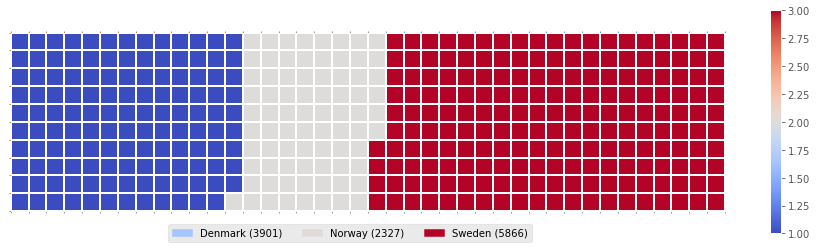

In [17]:
# sekarang kita dapat memanggil fungsi kita untuk membuat waffle.
create_waffle_chart(categories, values, height, width, colormap)

# Word Cloud
`Word clouds` *(dikenal sebagai text clouds atau tag clouds)* **cara bekerjanya dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.** Tentunya *package Word Clouds* sudah ada di Python untuk menghasilkan word clouds. Package bernama `word_cloud` dikembangkan oleh **Andreas Mueller**. Kalian dapat mempelajari lebih lanjut tentang paket dengan mengikuti link ini. https://github.com/amueller/word_cloud/

Kalian dapat menggunakan `wordclaude` dengan menginstall `wordclaude` terlebih dahulu
```python
conda install -c conda-forge wordcloud
```

In [18]:
# install wordcloud 
# !conda install -c conda-forge wordcloud --yes 
# import package and its set of stopwords 
from wordcloud import WordCloud, STOPWORDS 

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


*Word clouds* biasanya digunakan **untuk melakukan analisis tingkat tinggi dan visualisasi data teks**. Kalian akan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan *Lewis Carroll* berjudul **Alice's Adventures in Wonderland**. 
```python
# untuk mendownload file kalian dapat mengggunakan perintah 
# download file and save as alice_novel.txt 
!wget --quiet 
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt 
-O alice_novel.txt 
```

In [19]:
# open the file and read it into a variable alice_novel 
alice_novel = open('alice_novel.txt', 'r').read() 
print ('File downloaded and saved!')

File downloaded and saved!


Selanjutnya, mari gunakan perintah `stopwords` yang kita impor dari `word_cloud`. Kalian dapat menggunakan set untuk menghapus stopword yang berlebihan.

In [20]:
stopwords = set(STOPWORDS)

Buat lah *`word cloud object`* dan *`generate word cloud`*. **Agar lebih ringkas, mari kita buat *word cloud* hanya dengan menggunakan `2000 kata` pertama dalam novel**.

In [21]:
# untuk membuat word claud objek
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

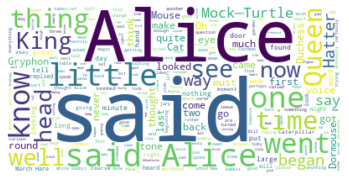

In [22]:
# perintah ini kalian dapat membuat dan memvisualisasikan 
plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()


Jadi di yang ditampilkan pada gambar adalah *`2000 kata` pertama dalam novel*, kata yang paling umum yang sering keluar adalah **Alice**, **said**, **little**, **went** dan seterusnya. Nah Kalian dapat merubah ukuran *word cloud* untuk dapat kalian melihat kata-kata yang jarang digunakan dengan lebih baik.

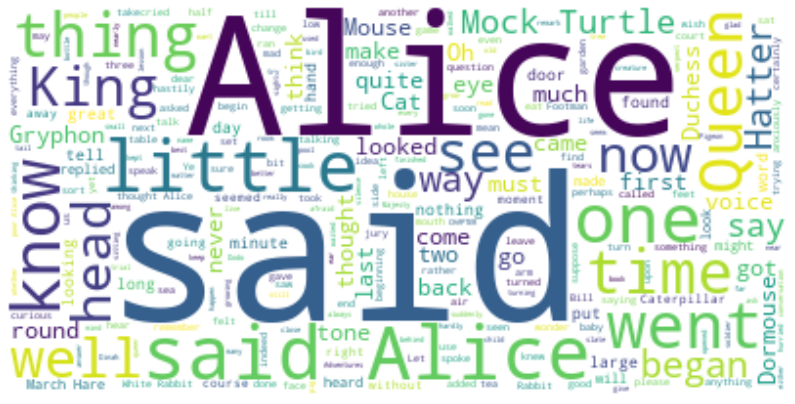

In [23]:
fig = plt.figure() 
fig.set_figwidth(14) # untuk mengatur lebar 
fig.set_figheight(18) # untuk mengatur tinggi

# untuk menampilkan word_cloud
plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()


Pada gambar word_cloud kalian dapat melihat kata **`said`** bukanlah kata yang *informatif*. Jadi, kalian dapat menambahkan ke *stopwords* kita dan buat ulang cloud.

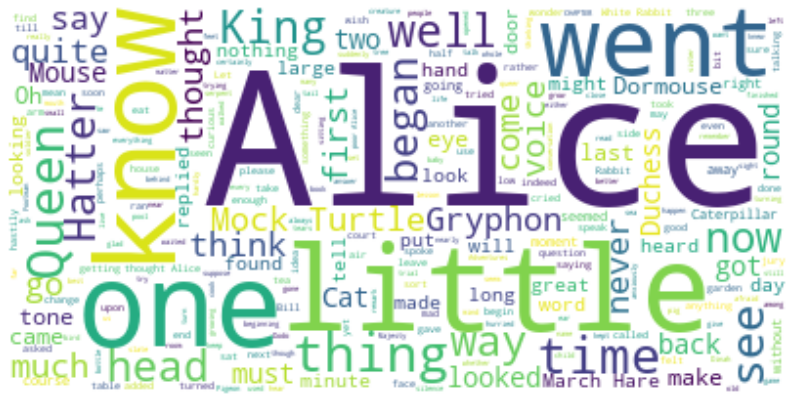

In [24]:
# perintah ini untuk memberhentikan kata 'said' 
stopwords.add('said') 

# membuat ulang word cloud menjadi 2000 kata
alice_wc.generate(alice_novel) 

# display the cloud 
fig = plt.figure() 

fig.set_figwidth(14) # set width 
fig.set_figheight(18) # set height 

plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

Kalian terapkan dengan **package `word_cloud`** adalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan `mask` *Alice* dan *kelincinya*. Kami sudah membuatkan `mask` untuk kalian, jadi mari lanjutkan dan unduh dan beri nama `alice_mask.png`.

```python
# untuk mendownload file png kalian dapat mengggunakan perintah 
# download file and save as alice_mask.png 
!wget --quiet 
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png 
```

In [25]:
# perintah ini untuk membuka file image
alice_mask = np.array(Image.open('alice_mask.png')) 
print('Image downloaded and saved!')

Image downloaded and saved!


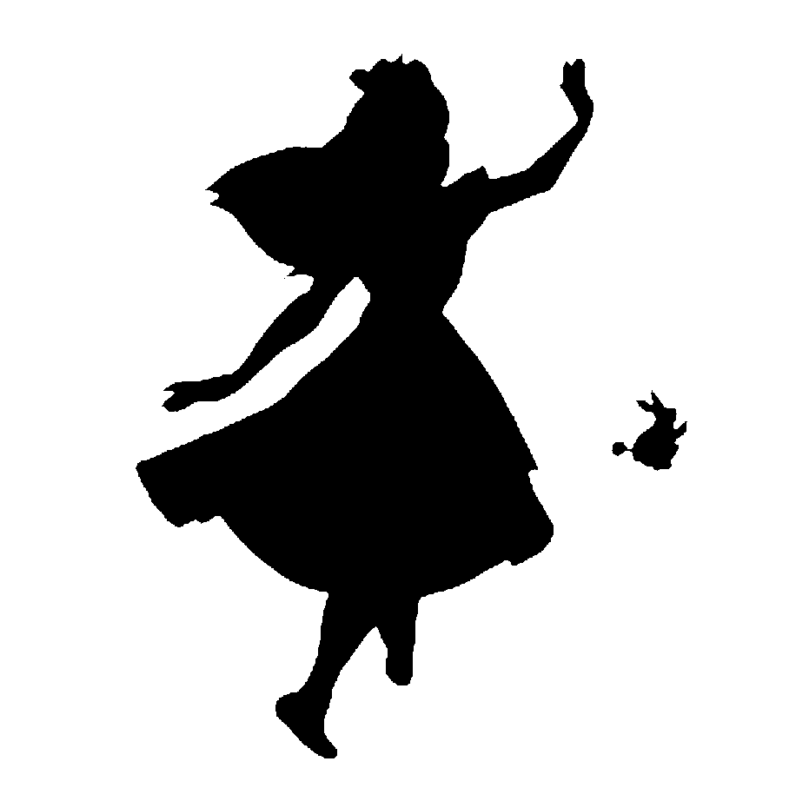

In [26]:
fig = plt.figure() 

fig.set_figwidth(14) # set width 
fig.set_figheight(18) # set height 

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear') 
plt.axis('off') 
plt.show()

Sekarang kita akan menggabungkan gambar *`alice_mask`* dan *word_cloud `alice_wc`*. Agar simple, kita akan terus menggunakan `2000 kata` pertama dalam novel.

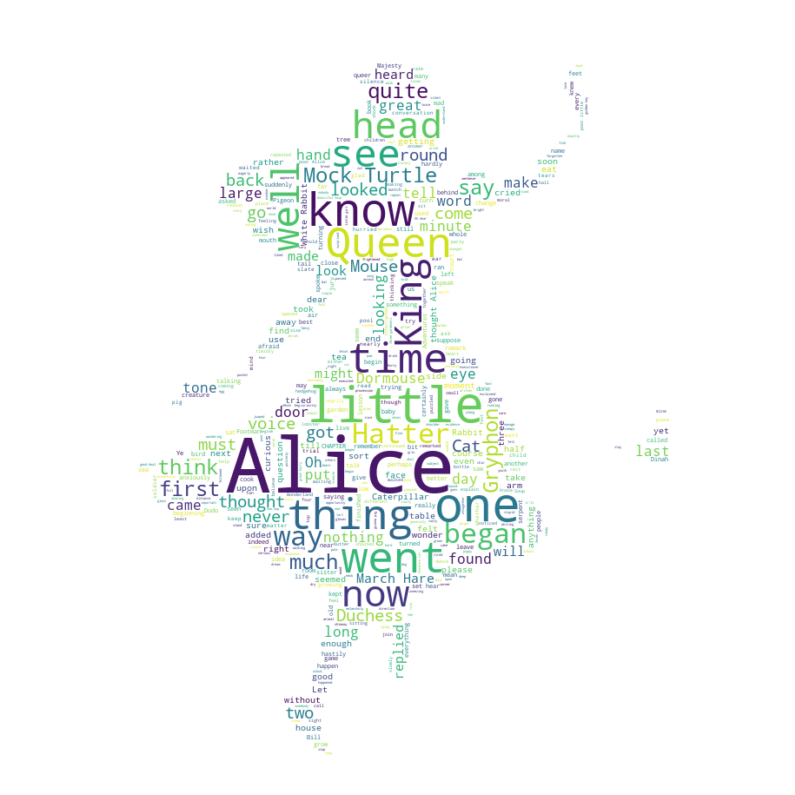

In [27]:
# membuat objek word_clode
alice_wc = WordCloud(
    background_color='white', 
    max_words=2000, mask=alice_mask, 
    stopwords=stopwords
) 

# menghasilkan word_cloud (alice_novel) 
alice_wc.generate(alice_novel) 

# menampilkan word cloud 
fig = plt.figure() 
fig.set_figwidth(14) # mengatur lebar 
fig.set_figheight(18) # mengatur tinggi

plt.imshow(alice_wc, interpolation='bilinear') 
plt.axis('off') 
plt.show()

>**Kita juga dapat membuat word_cloude kita dalam bentuk data imigrasi**

Katakanlah jumlah text dalam dataset `90 kata`. Mari kita ingat seperti apa data kita.

In [28]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [29]:
# jumlah total nilai data imigran dari tahun 1980 sampai 2013
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan index *countries* dengan nama satu kata, **kita dapat duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.**

In [53]:
max_words = 90 

word_string = '' 


for country in df_can.index.values: # check if country's name is a single-word name 
    if len(country.split(' ')) == 1: 
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words) 
        word_string = word_string + ((country + ' ') * repeat_num_times)
        # display the generated text 
        
print('semua : ',word_string)

semua :  China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania 


Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

In [54]:
# membuat wordcloud dengan mengenerate variabel word_string
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


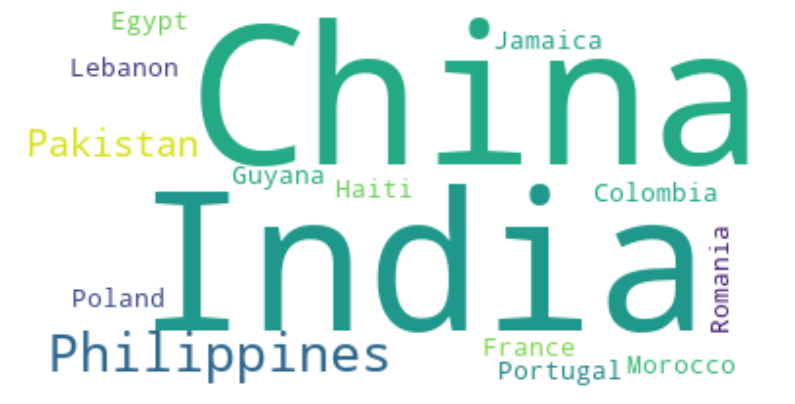

In [56]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

>Kesimpulanng : jumlah 15 negara ditampilkan dan jumlah negara paling banyak akan ditampilkan nama negaranya paling besar.

Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

# Regresion Plot
**Seaborn** termasuk salah satu librari visualisasi dari *matplotlib*. *Matplotlib* menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik.
https://seaborn.pydata.org dan http://seaborn.pydata.org/generated/seaborn.regplot.html

installasi seaborn pada Anaconda - Jupyter Notebook
```python
conda install -c conda-forge seaborn
```

In [57]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


>Contoh Searborn Sederhana menampilkan jumlah totall imigran yang mendarat ke kanada pertahunnya.

In [62]:
# untuk menjumlahkan semua total jumlah populasi imigran pertahunnya 
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417
1985,69978
1986,86048
1987,134771
1988,139306
1989,164432


In [63]:
# mengganti index dataframe dengan tipe data float (ini sangat penting untuk visualisasi regresion)
df_tot.index = map(float,df_tot.index)
df_tot.index 

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0],
             dtype='float64')

In [64]:
# untuk me-riset kembali kolom index
df_tot.reset_index(inplace = True)
df_tot.index 

RangeIndex(start=0, stop=34, step=1)

In [68]:
# untuk mengubah kategori kolom dan index
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head(20)

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417
5,1985.0,69978
6,1986.0,86048
7,1987.0,134771
8,1988.0,139306
9,1989.0,164432


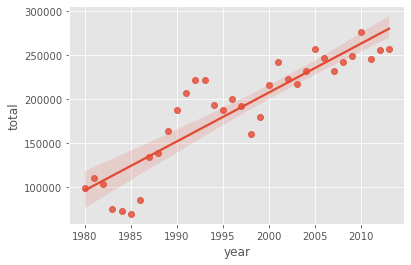

In [67]:
# Plot regresi sudah dapat dibuat
import seaborn as sns
ax = sns.regplot(x='year', y='total', data=df_tot)

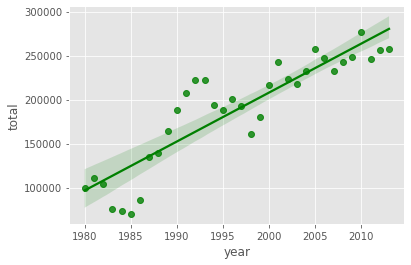

In [69]:
# terlihat regresi jumlah penduduk setiap tahunnnya naik
# kalian dapat menyusuaikan dengan warna hijau
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

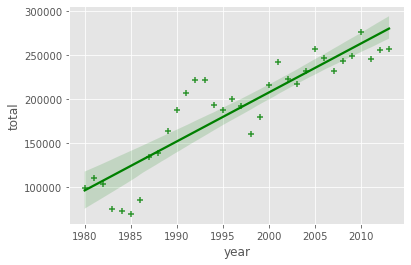

In [73]:
# dan kalian juga dapat menyesuaikan bentuk marker '+'(pengganti titik untuk menampilkan jumlah data)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

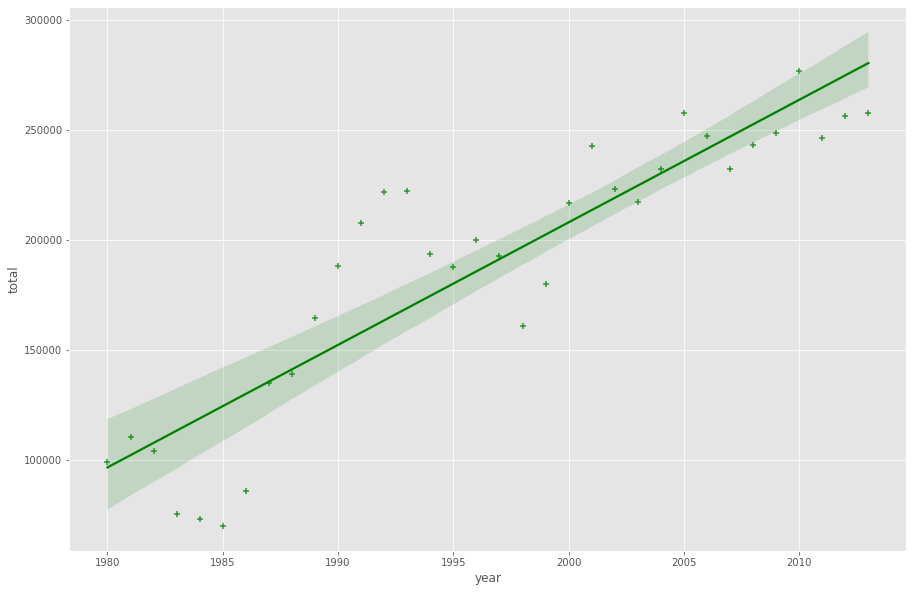

In [74]:
# kalian dapat menggunakan perintah figsize untuk memperbesar visual regresinya
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

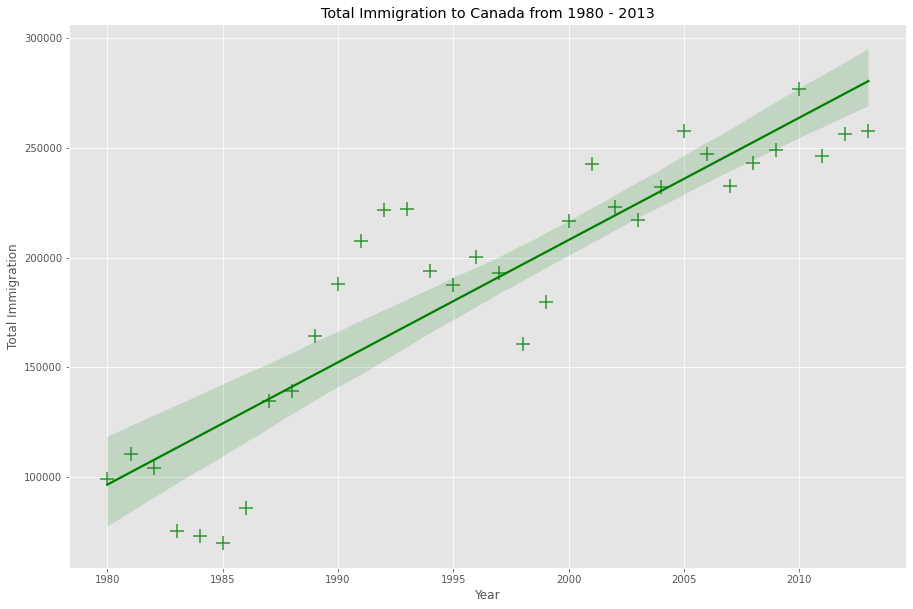

In [76]:
# Kalian bisa sesuaikan ukuran marker, menambahkan keterangan dengan menggunakan label
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

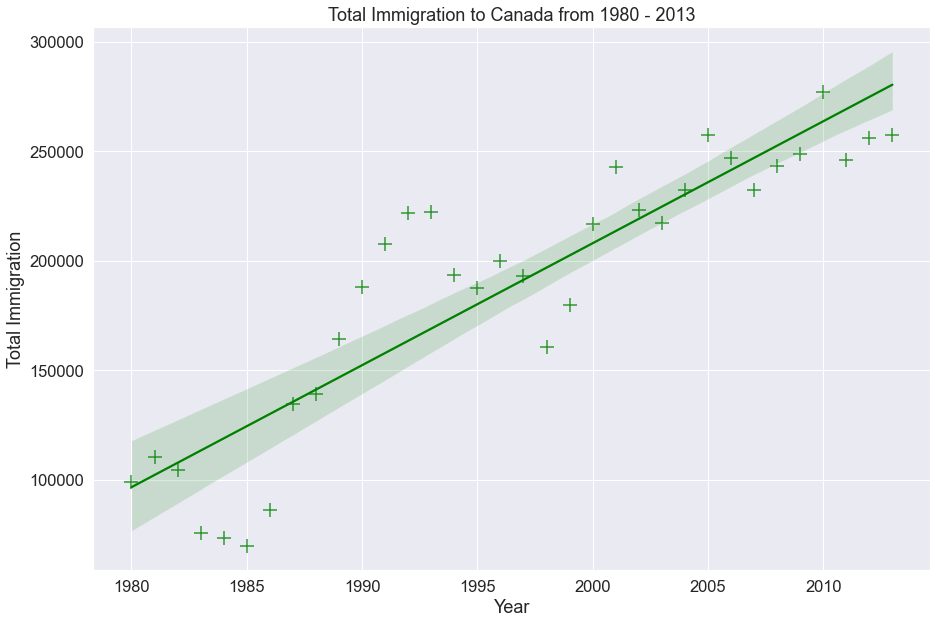

In [79]:
# Kalia dapat sesuaikan ukuran font keterangan label tanda centang, agar terlihat menarik

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

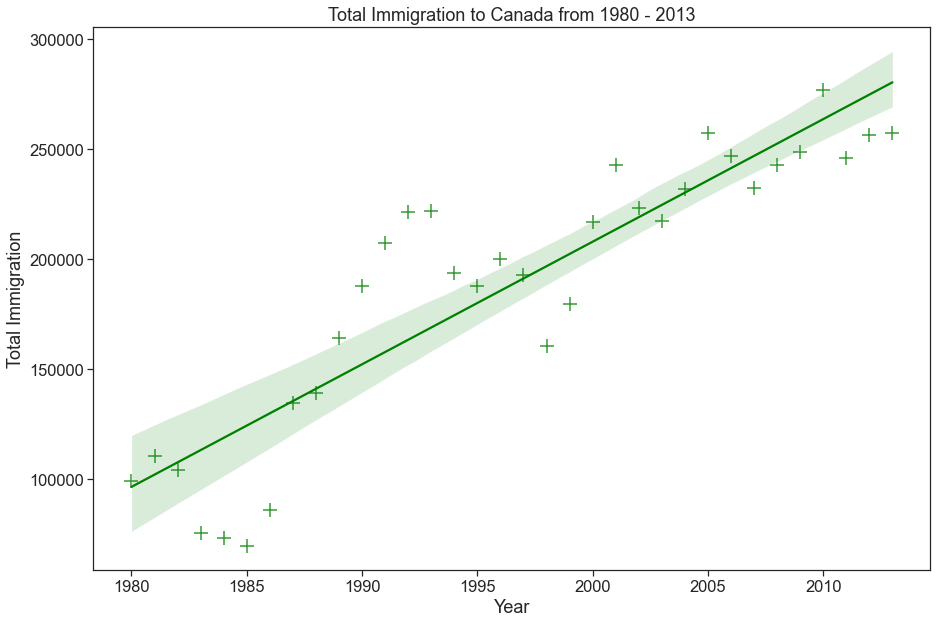

In [80]:
# kalian dapat menyesuaikan latar belakang visual dengan warna putih
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

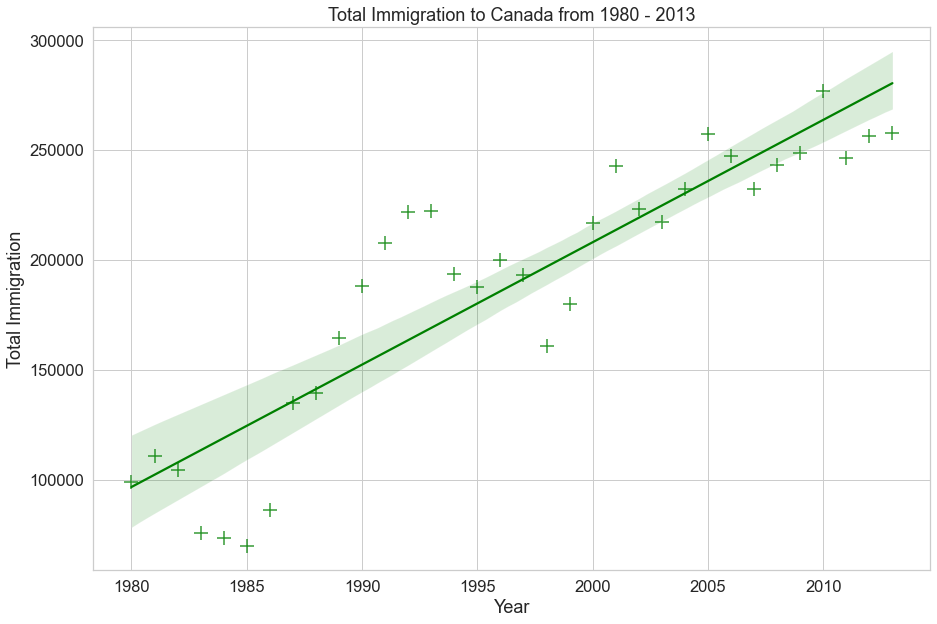

In [81]:
# bentuk latar belakang lainnya kalian dapat menggunnakan kisi-kisi putih
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

>**Contoh masalah kedua** 

**Pertanyaan** : Gunakan seaborn untuk scatter plot  dengan garis regresi untuk memvisualisasikan total imigrasi dari *Denmark*, *Swedia*, dan *Norwegia* ke **Kanada** dari *tahun 1980* hingga *2013*.

In [82]:
# berikut untuk menampilkan data 3 negara 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


In [83]:
### type your answer here
# perintah ini untuk menampung 3 negara diatas dan tahun dijadikan sebagai index
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128
1985,73,54,158
1986,93,56,187
1987,109,80,198
1988,129,73,171
1989,129,76,182


In [84]:
# untuk menyimpan jumlah total penduduk diatas pada setiap tahunnya
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total

,0
1980,669
1981,678
1982,627
1983,333
1984,252
1985,285
1986,336
1987,387
1988,373
1989,387


In [87]:
# untuk membuat index baru angka, dan tahun dijadikan kolom 1
df_total.reset_index(inplace=True)
df_total.index

RangeIndex(start=0, stop=34, step=1)

In [95]:
# pemberian nama kolom
df_total.columns = ['year', 'total']
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


In [96]:
# mengganti tipe data kolom tahun dari string ke int untuk membuat scatter plot
df_total['year'] = df_total['year'].astype(int)
df_total

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252
5,1985,285
6,1986,336
7,1987,387
8,1988,373
9,1989,387


Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

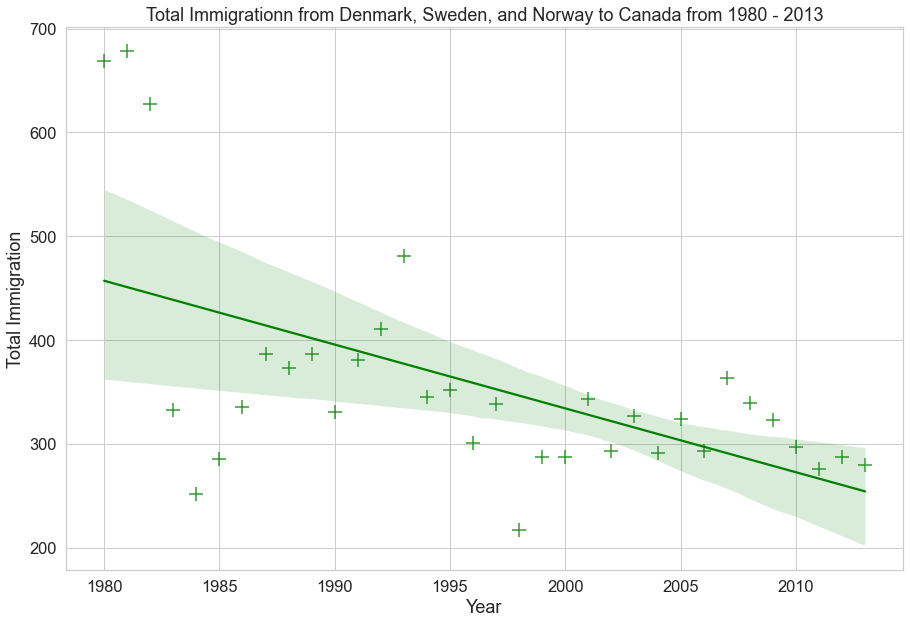

In [97]:
# perintah ini untuk menampilkan visual regresi plot
# mengatur ukuran gambar
plt.figure(figsize=(15, 10))

# mengatur latar belakang dan ukuran tulisan
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')